In [1]:
# kaggel에서 데이터 다운 받기
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-mat.csv')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px # plotly라는 시각화라이브러리
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import missingno as msno # 결측치를 확인할 수 있는 라이브러리
import os
import sys
import warnings
import chart_studio
import chart_studio.plotly as py

warnings.filterwarnings('ignore')

# pandas 옵션 지정 -> 최대 컬럼 수 출력, float는 2자리까지 출력
pd.options.display.max_columns = 50
pd.options.display.float_format = '{:.2f}'.format

# ****About Dataset****

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

1. G1 - first period grade (numeric: from 0 to 20)
2. G2 - second period grade (numeric: from 0 to 20)
3. G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
mat_df = pd.read_csv('~/desktop/git/hakcerton/data/student-alcohol-consumption/student-mat.csv')
pot_df = pd.read_csv('~/desktop/git/hakcerton/data/student-alcohol-consumption/student-por.csv')

mat_df.head()

In [3]:
# 복사본으로 카피
mat_eda_df = mat_df.copy()
pot_eda_df = pot_df.copy()

In [4]:
mat_eda_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [5]:
pot_eda_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


<AxesSubplot:>

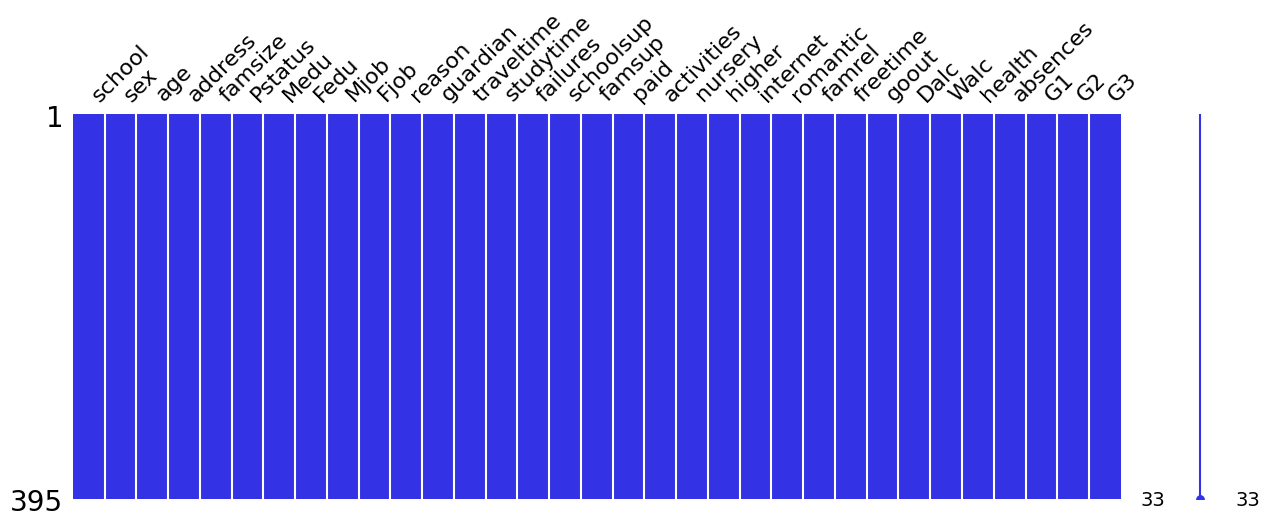

In [6]:
msno.matrix(df=mat_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5))

<AxesSubplot:>

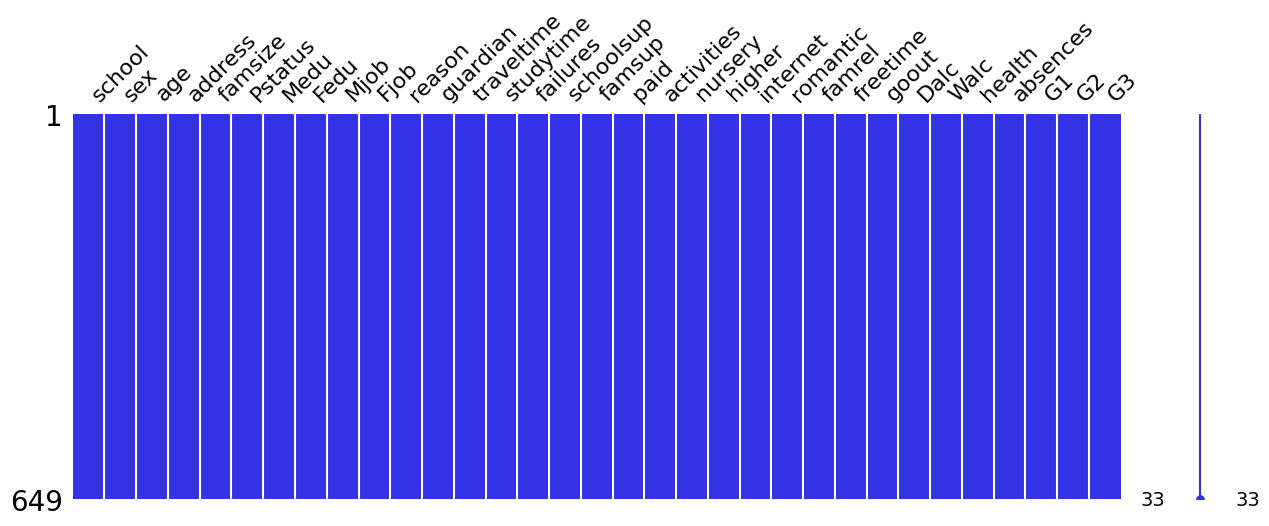

In [7]:
msno.matrix(df=pot_eda_df.iloc[:, :], color=(0.2, 0.2, 0.9), figsize=(15, 5))

In [8]:
# 수학은 M 포트투칼 어는 P
mat_eda_df['subject'] = 'M'
pot_eda_df['subject'] = 'P'

In [9]:
concat_df = pd.concat([mat_eda_df, pot_eda_df], axis=0)

In [10]:
# Dalc 컬럼을  Dalc 와 Walc의 평균으로 재조정
concat_df['Malc'] = (concat_df['Dalc'] + concat_df['Walc']) / 2
concat_df.drop(['Dalc','Walc'], axis=1, inplace=True)

In [11]:
concat_df['Agrade'] = (concat_df['G1'] + concat_df['G2'] + concat_df['G3']) / 3
concat_df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [12]:
concat_df.reset_index(inplace=True)
concat_df.drop('index', axis=1, inplace=True)

In [13]:
#concat_df.drop('level_0', axis=1, inplace=True)

In [14]:
concat_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,subject,Malc,Agrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,6,M,1.00,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,M,1.00,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,3,10,M,2.50,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,M,1.00,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,M,1.50,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,5,4,P,1.50,10.33
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,4,P,1.00,15.33
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,5,6,P,1.00,10.67
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,2,6,P,3.50,10.00


## 상관관계

In [15]:
from dython.nominal import identify_nominal_columns
cat_featrues = identify_nominal_columns(mat_eda_df)
cat_featrues

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'subject']

In [16]:
from dython.nominal import associations

## 수학성적데이터 상관관계

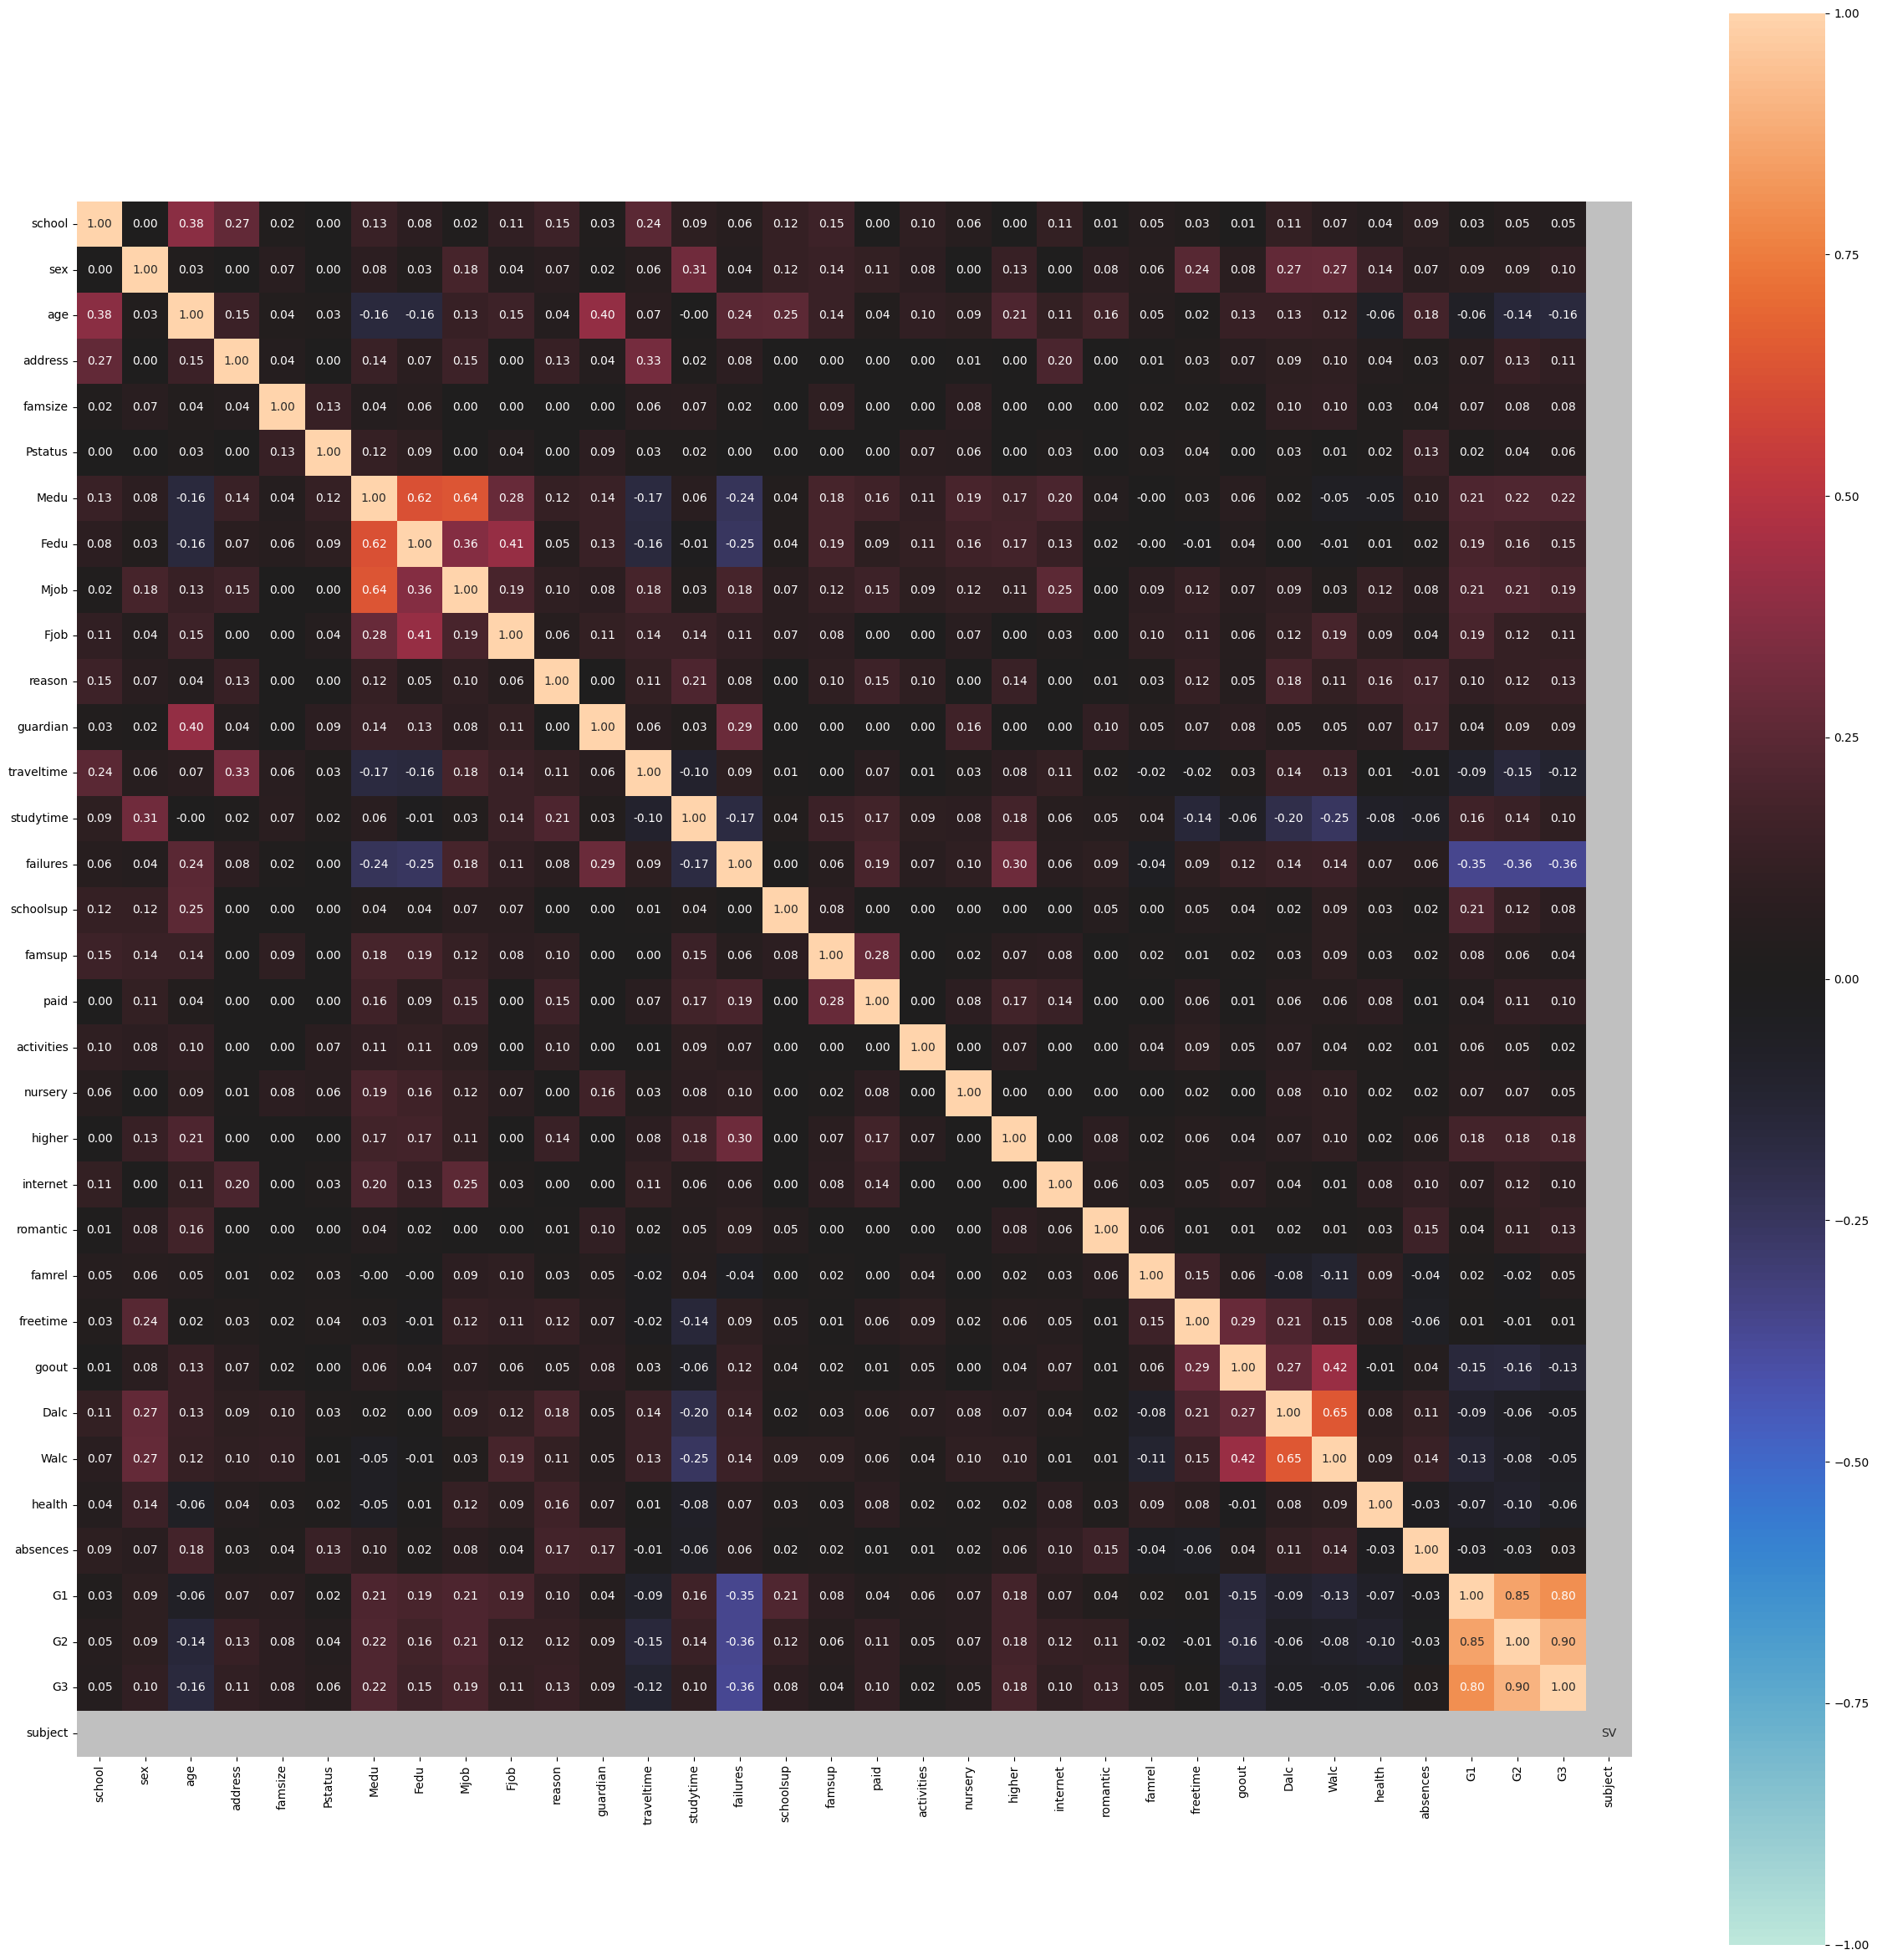

In [17]:
# math 데이터 상관관계
complete_correlation = associations(mat_eda_df, filename='./corr_png/mat_correlation.png', figsize=(30, 30))

In [18]:
# Dalc과 feature 간의 상관관계
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
Dalc,0.114,0.268,0.131,0.093,0.102,0.031,0.020,0.002,0.095,0.115,0.181,0.054,0.138,-0.196,0.136,0.021,0.032,0.062,0.067,0.085,0.070,0.036,0.015,-0.078,0.209,0.267,1.000,0.648,0.077,0.112,-0.094,-0.064,-0.055,0.000
Walc,0.065,0.274,0.117,0.101,0.103,0.006,-0.047,-0.013,0.033,0.185,0.114,0.048,0.134,-0.254,0.142,0.087,0.087,0.060,0.037,0.100,0.100,0.012,0.010,-0.113,0.148,0.420,0.648,1.000,0.092,0.136,-0.126,-0.085,-0.052,0.000
sex,0.000,1.000,0.029,0.000,0.068,0.000,0.078,0.035,0.185,0.043,0.070,0.018,0.060,0.306,0.044,0.121,0.138,0.113,0.080,0.000,0.130,0.000,0.083,0.059,0.239,0.076,0.268,0.274,0.144,0.067,0.092,0.091,0.103,0.000
goout,0.007,0.076,0.127,0.069,0.023,0.003,0.064,0.043,0.072,0.060,0.053,0.084,0.029,-0.064,0.125,0.038,0.016,0.010,0.046,0.005,0.040,0.074,0.008,0.065,0.285,1.000,0.267,0.420,-0.010,0.044,-0.149,-0.162,-0.133,0.000
freetime,0.033,0.239,0.016,0.035,0.018,0.039,0.031,-0.013,0.120,0.108,0.121,0.069,-0.017,-0.143,0.092,0.045,0.011,0.064,0.090,0.025,0.061,0.051,0.011,0.151,1.000,0.285,0.209,0.148,0.076,-0.058,0.013,-0.014,0.011,0.000
reason,0.155,0.070,0.041,0.130,0.000,0.000,0.119,0.050,0.096,0.057,1.000,0.000,0.112,0.207,0.076,0.000,0.096,0.152,0.100,0.000,0.135,0.000,0.009,0.029,0.121,0.053,0.181,0.114,0.162,0.173,0.104,0.122,0.125,0.000
traveltime,0.242,0.060,0.071,0.328,0.063,0.028,-0.172,-0.158,0.185,0.136,0.112,0.063,1.000,-0.101,0.092,0.009,0.003,0.066,0.008,0.033,0.084,0.111,0.022,-0.017,-0.017,0.029,0.138,0.134,0.008,-0.013,-0.093,-0.153,-0.117,0.000
failures,0.060,0.044,0.244,0.079,0.016,0.003,-0.237,-0.250,0.182,0.107,0.076,0.291,0.092,-0.174,1.000,0.000,0.055,0.188,0.069,0.101,0.300,0.063,0.093,-0.044,0.092,0.125,0.136,0.142,0.066,0.064,-0.355,-0.356,-0.360,0.000
age,0.378,0.029,1.000,0.147,0.038,0.030,-0.164,-0.163,0.129,0.154,0.041,0.401,0.071,-0.004,0.244,0.252,0.141,0.036,0.103,0.087,0.209,0.112,0.165,0.054,0.016,0.127,0.131,0.117,-0.062,0.175,-0.064,-0.143,-0.162,0.000
Fjob,0.106,0.043,0.154,0.000,0.000,0.041,0.284,0.410,0.191,1.000,0.057,0.111,0.136,0.137,0.107,0.071,0.084,0.000,0.000,0.070,0.000,0.026,0.000,0.095,0.108,0.060,0.115,0.185,0.088,0.042,0.191,0.120,0.115,0.000


In [19]:
# 오름차순으로 정렬
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [20]:
# 전체 상관관계 출력
px.bar(corr_df, x='Dalc')

## 포르투칼어 데이터 상관관계

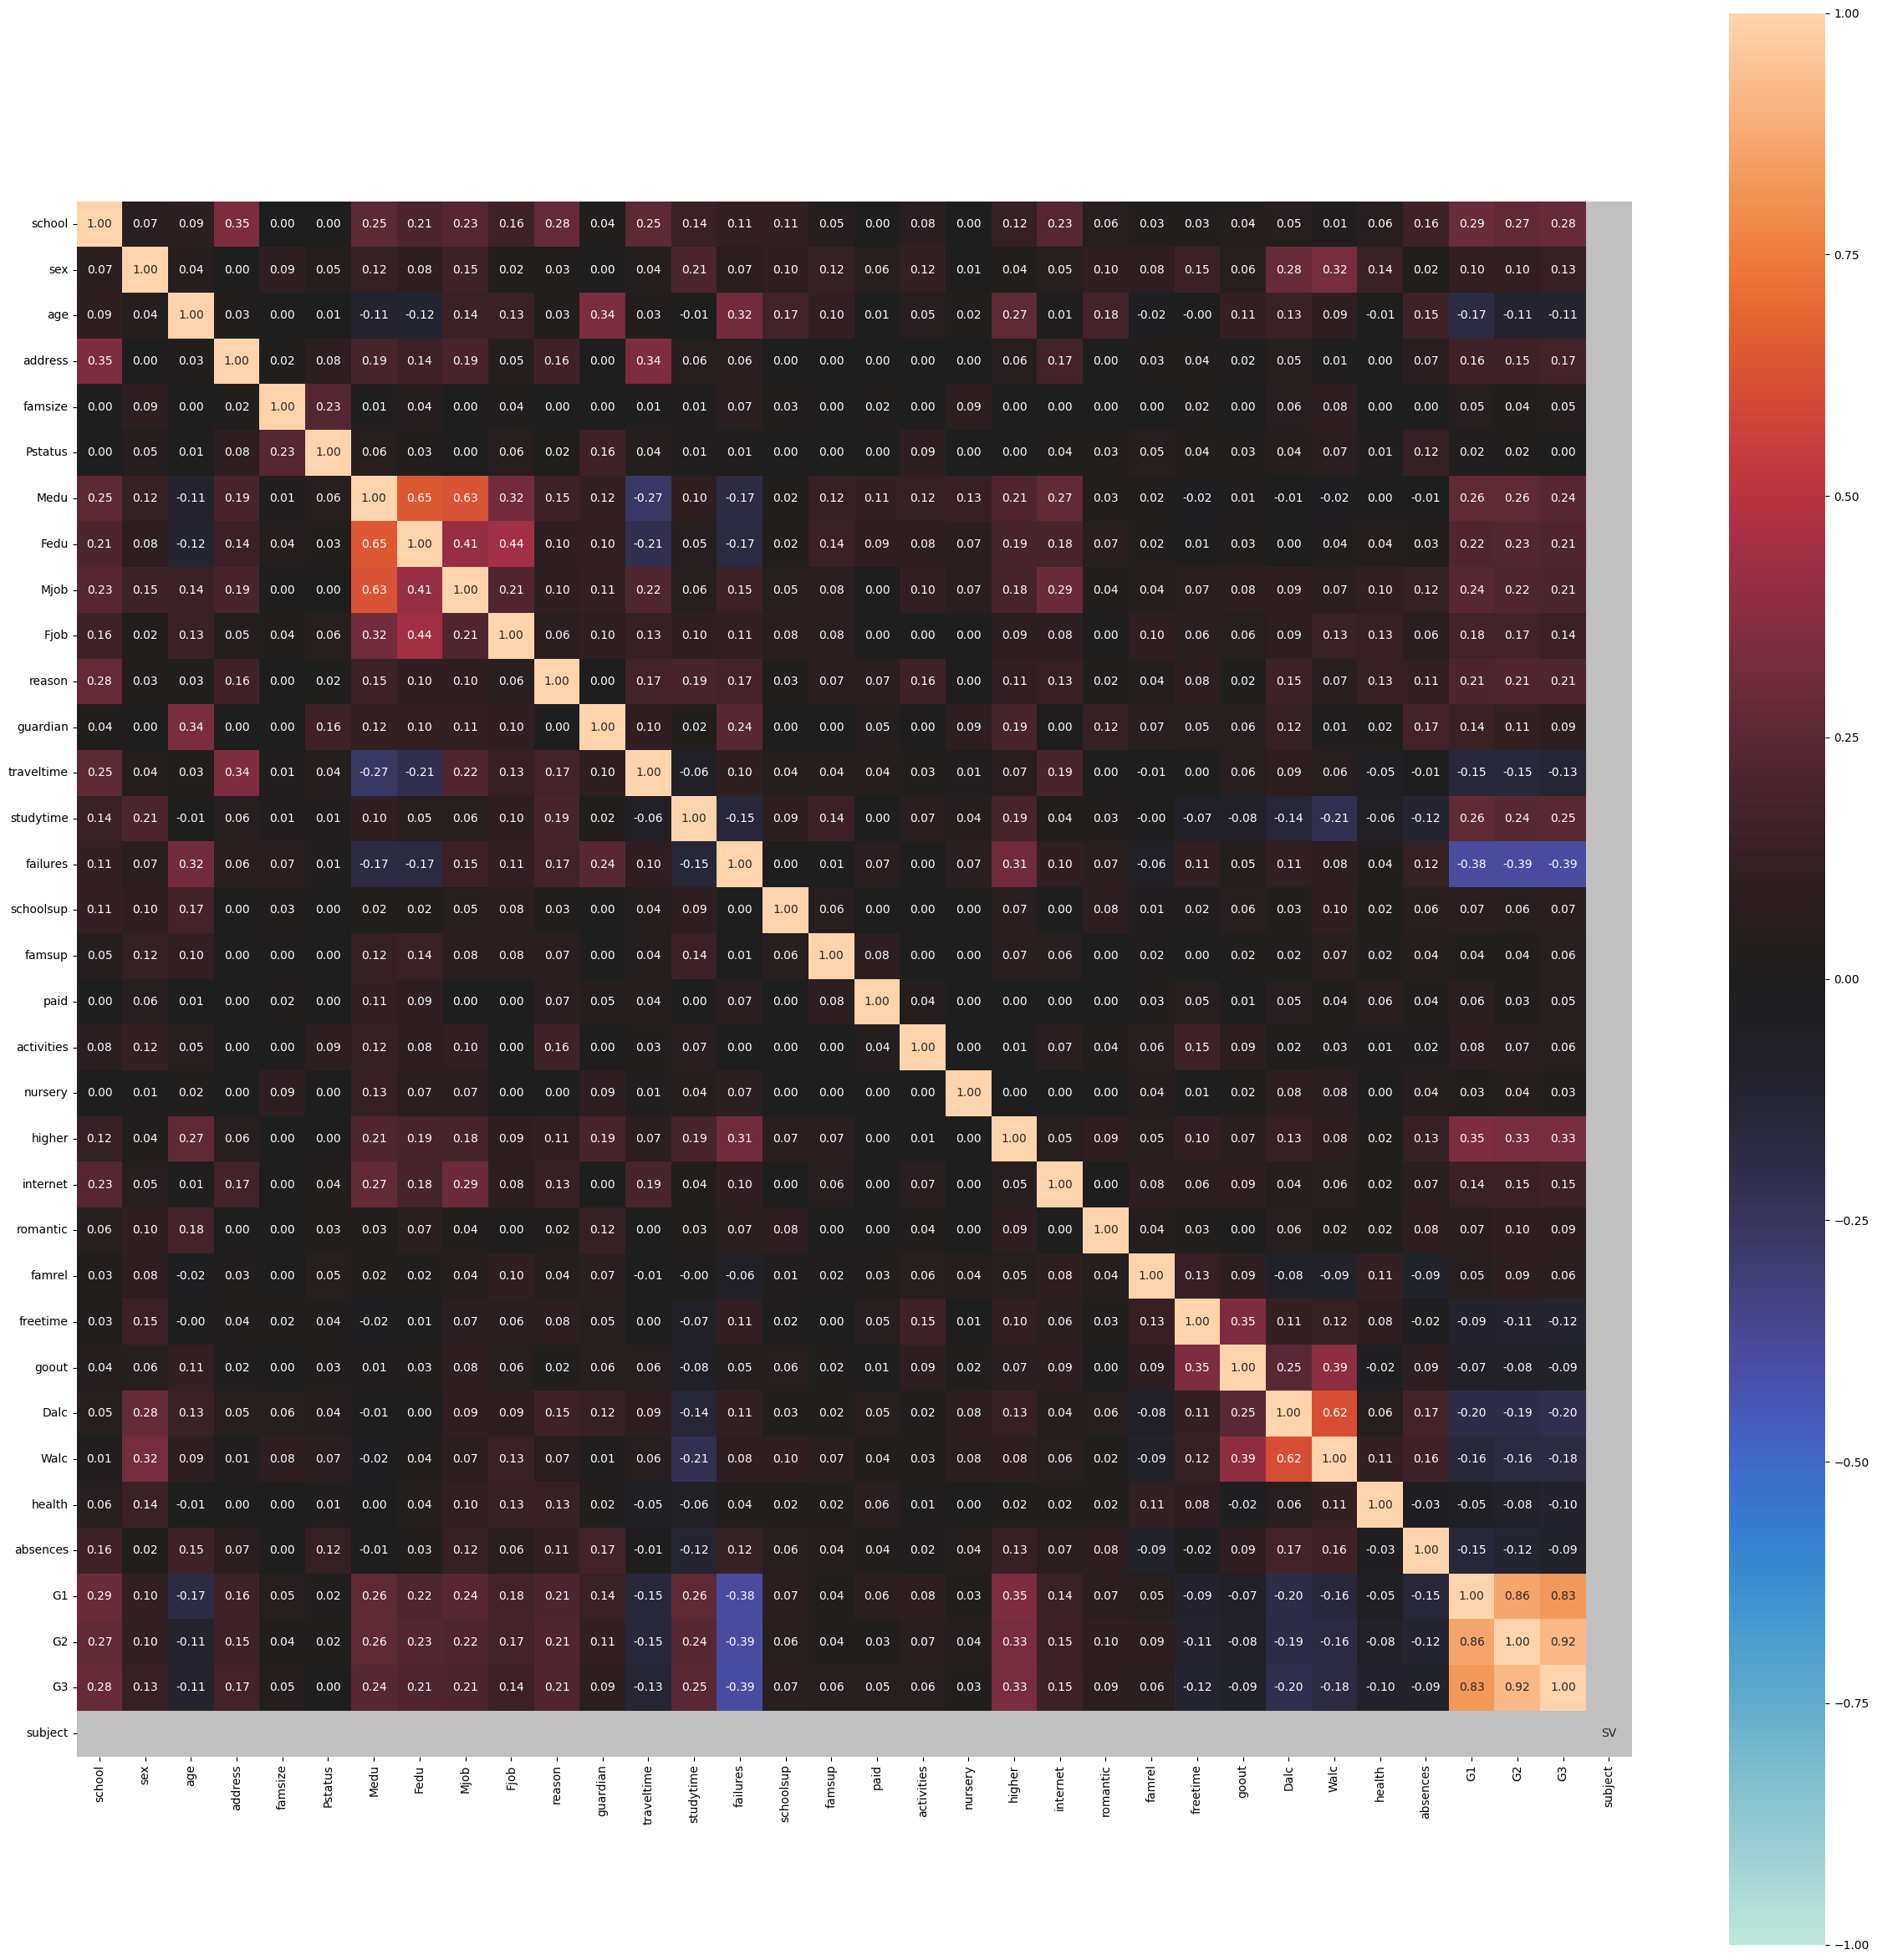

In [21]:
# 포르투갈 전체 상관관계 히트맵
complete_correlation = associations(pot_eda_df, filename='./corr_png/mat_correlation.png', figsize=(30, 30))

In [22]:
# Dalc와 featurer간의 상관관계
complete_correlation['corr'].sort_values(by='Dalc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
Dalc,0.05,0.28,0.13,0.05,0.06,0.04,-0.01,0.00,0.09,0.09,0.15,0.12,0.09,-0.14,0.11,0.03,0.02,0.05,0.02,0.08,0.13,0.04,0.06,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20,0.00
Walc,0.01,0.32,0.09,0.01,0.08,0.07,-0.02,0.04,0.07,0.13,0.07,0.01,0.06,-0.21,0.08,0.10,0.07,0.04,0.03,0.08,0.08,0.06,0.02,-0.09,0.12,0.39,0.62,1.00,0.11,0.16,-0.16,-0.16,-0.18,0.00
sex,0.07,1.00,0.04,0.00,0.09,0.05,0.12,0.08,0.15,0.02,0.03,0.00,0.04,0.21,0.07,0.10,0.12,0.06,0.12,0.01,0.04,0.05,0.10,0.08,0.15,0.06,0.28,0.32,0.14,0.02,0.10,0.10,0.13,0.00
goout,0.04,0.06,0.11,0.02,0.00,0.03,0.01,0.03,0.08,0.06,0.02,0.06,0.06,-0.08,0.05,0.06,0.02,0.01,0.09,0.02,0.07,0.09,0.00,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09,0.00
absences,0.16,0.02,0.15,0.07,0.00,0.12,-0.01,0.03,0.12,0.06,0.11,0.17,-0.01,-0.12,0.12,0.06,0.04,0.04,0.02,0.04,0.13,0.07,0.08,-0.09,-0.02,0.09,0.17,0.16,-0.03,1.00,-0.15,-0.12,-0.09,0.00
reason,0.28,0.03,0.03,0.16,0.00,0.02,0.15,0.10,0.10,0.06,1.00,0.00,0.17,0.19,0.17,0.03,0.07,0.07,0.16,0.00,0.11,0.13,0.02,0.04,0.08,0.02,0.15,0.07,0.13,0.11,0.21,0.21,0.21,0.00
age,0.09,0.04,1.00,0.03,0.00,0.01,-0.11,-0.12,0.14,0.13,0.03,0.34,0.03,-0.01,0.32,0.17,0.10,0.01,0.05,0.02,0.27,0.01,0.18,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11,0.00
higher,0.12,0.04,0.27,0.06,0.00,0.00,0.21,0.19,0.18,0.09,0.11,0.19,0.07,0.19,0.31,0.07,0.07,0.00,0.01,0.00,1.00,0.05,0.09,0.05,0.10,0.07,0.13,0.08,0.02,0.13,0.35,0.33,0.33,0.00
guardian,0.04,0.00,0.34,0.00,0.00,0.16,0.12,0.10,0.11,0.10,0.00,1.00,0.10,0.02,0.24,0.00,0.00,0.05,0.00,0.09,0.19,0.00,0.12,0.07,0.05,0.06,0.12,0.01,0.02,0.17,0.14,0.11,0.09,0.00
freetime,0.03,0.15,-0.00,0.04,0.02,0.04,-0.02,0.01,0.07,0.06,0.08,0.05,0.00,-0.07,0.11,0.02,0.00,0.05,0.15,0.01,0.10,0.06,0.03,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12,0.00


In [23]:
# 상관관계 오름차순 정렬
corr_df = complete_correlation['corr'].sort_values(by='Dalc', ascending=False)

In [24]:
px.bar(corr_df, x='Dalc')

## 수학성적 데이터와 포르투칼 데이터 합친 상관관계

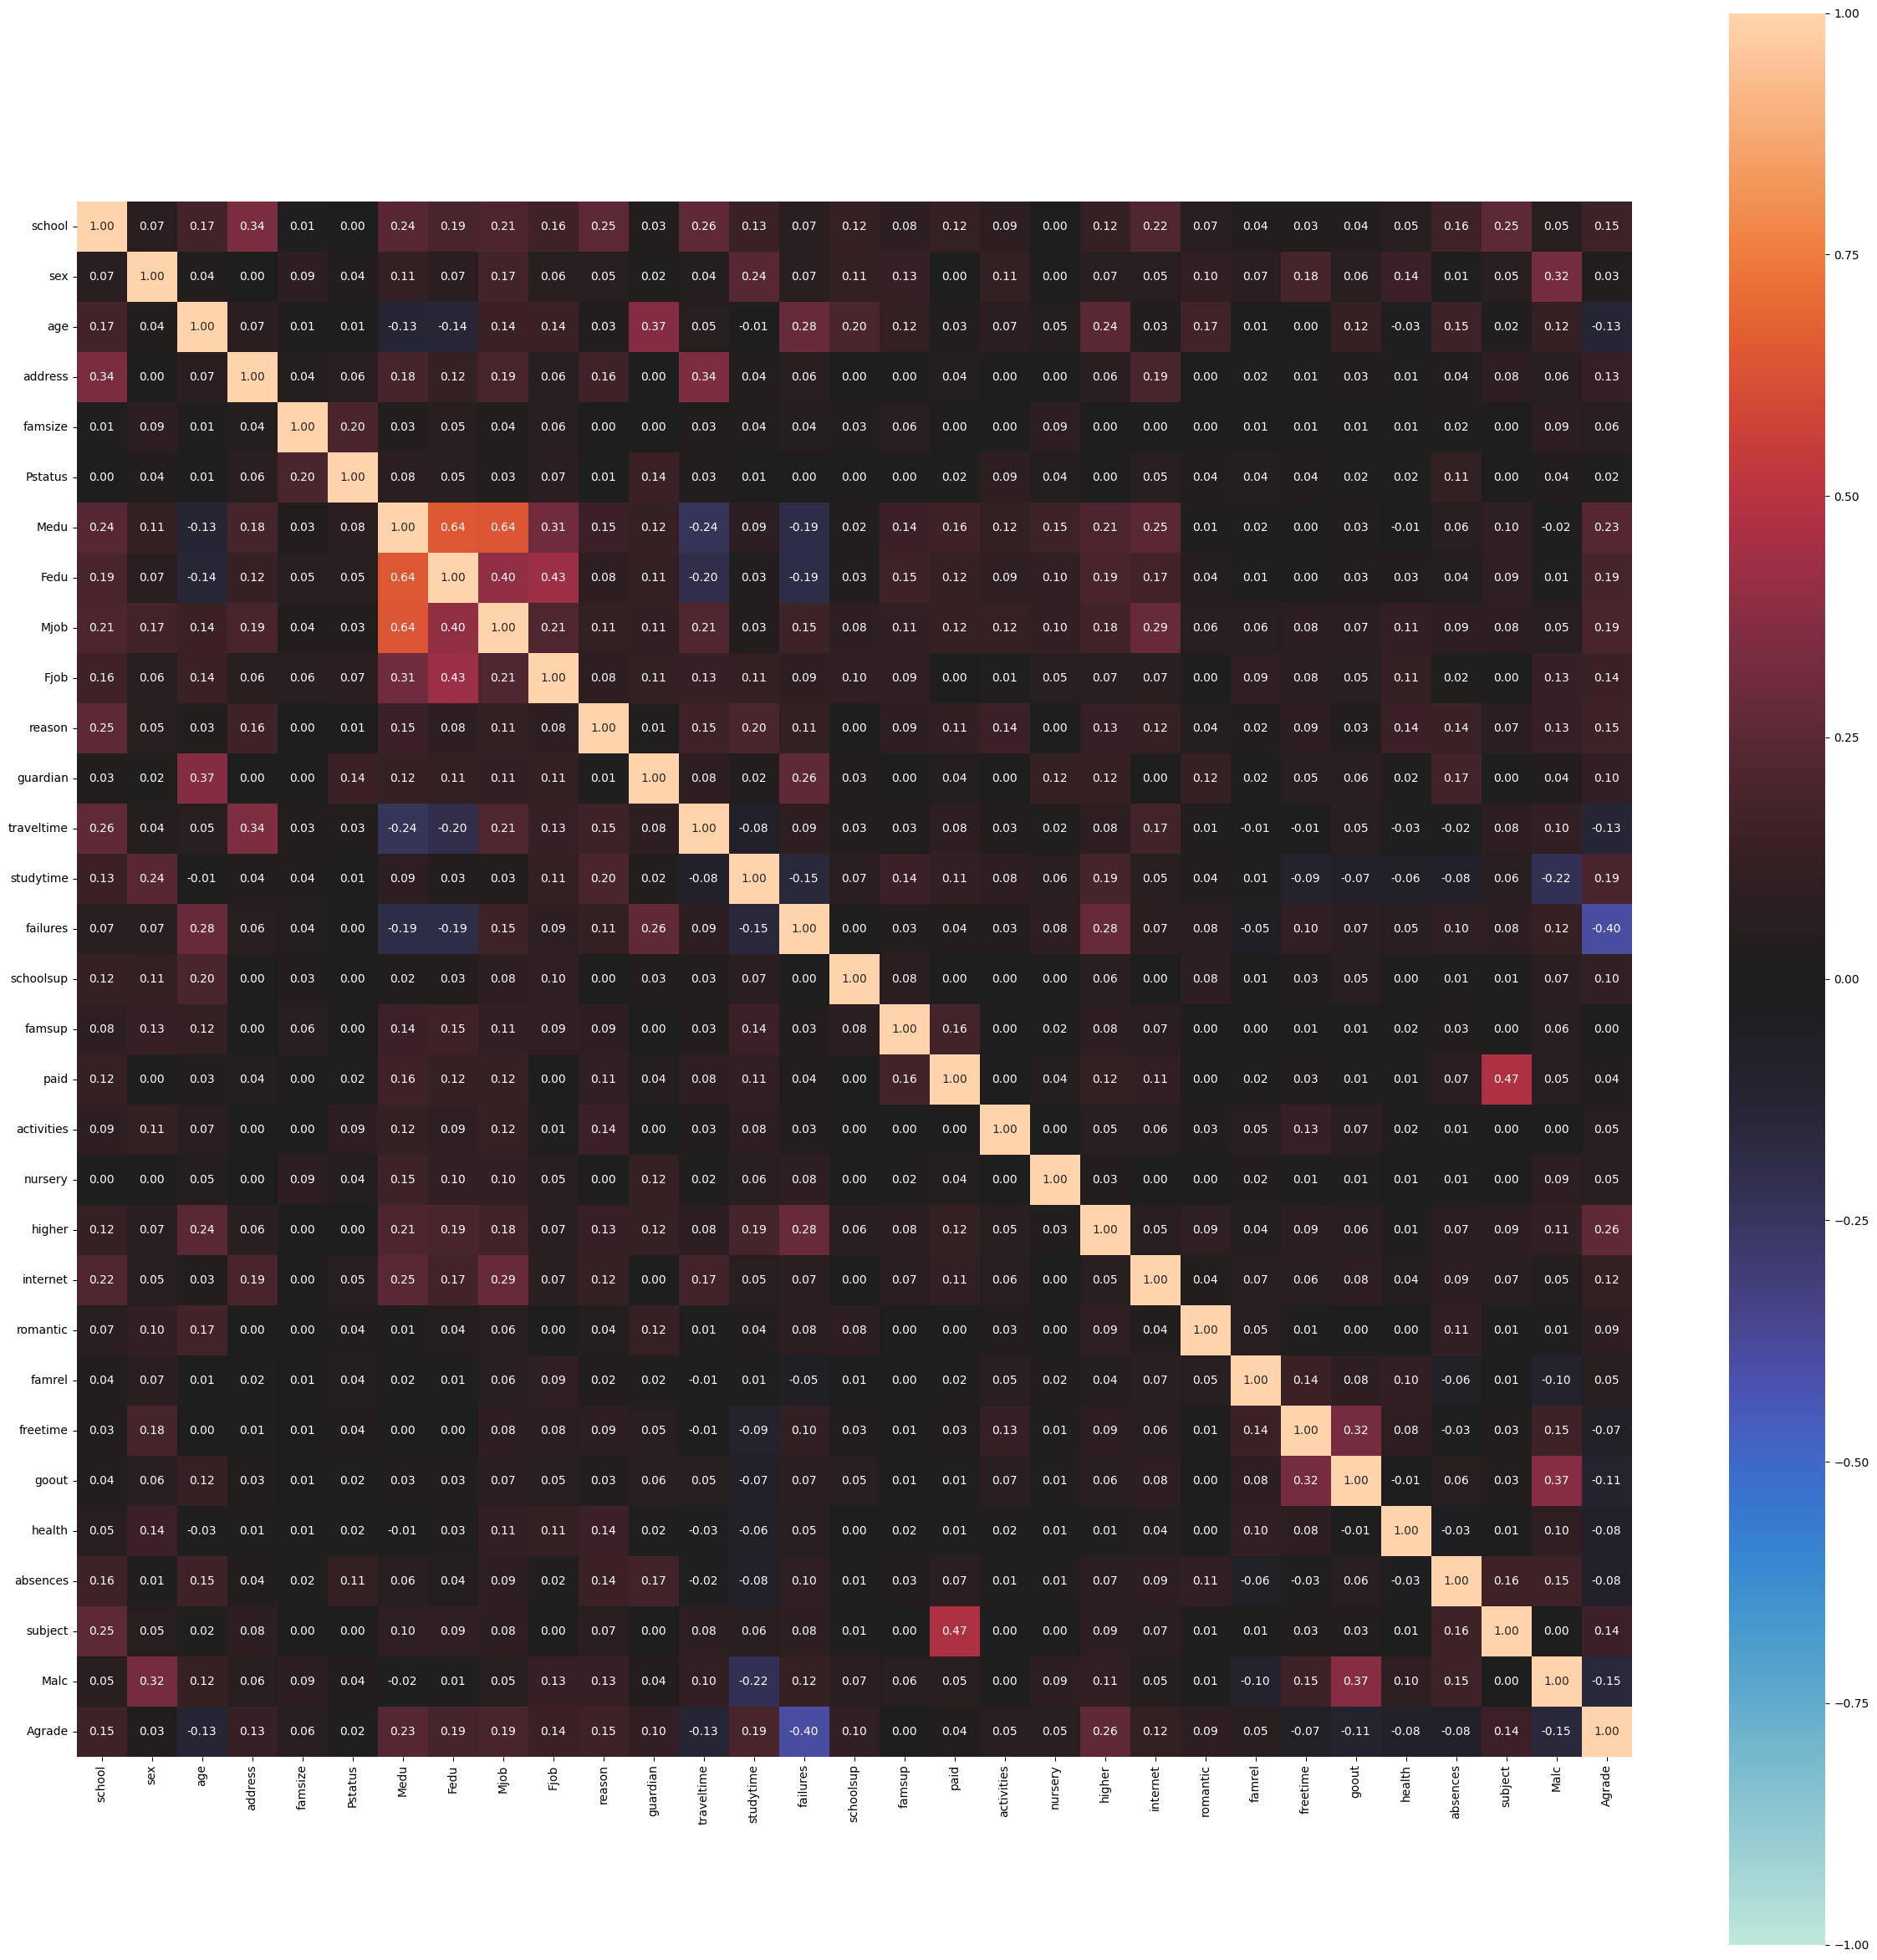

In [25]:
complete_correlation = associations(concat_df, filename='./corr_png/concat_corr.png', figsize=(30, 30))

In [26]:
corr_df = complete_correlation['corr'].sort_values(by='Malc', ascending=False)

In [27]:
px.bar(corr_df, x='Malc')

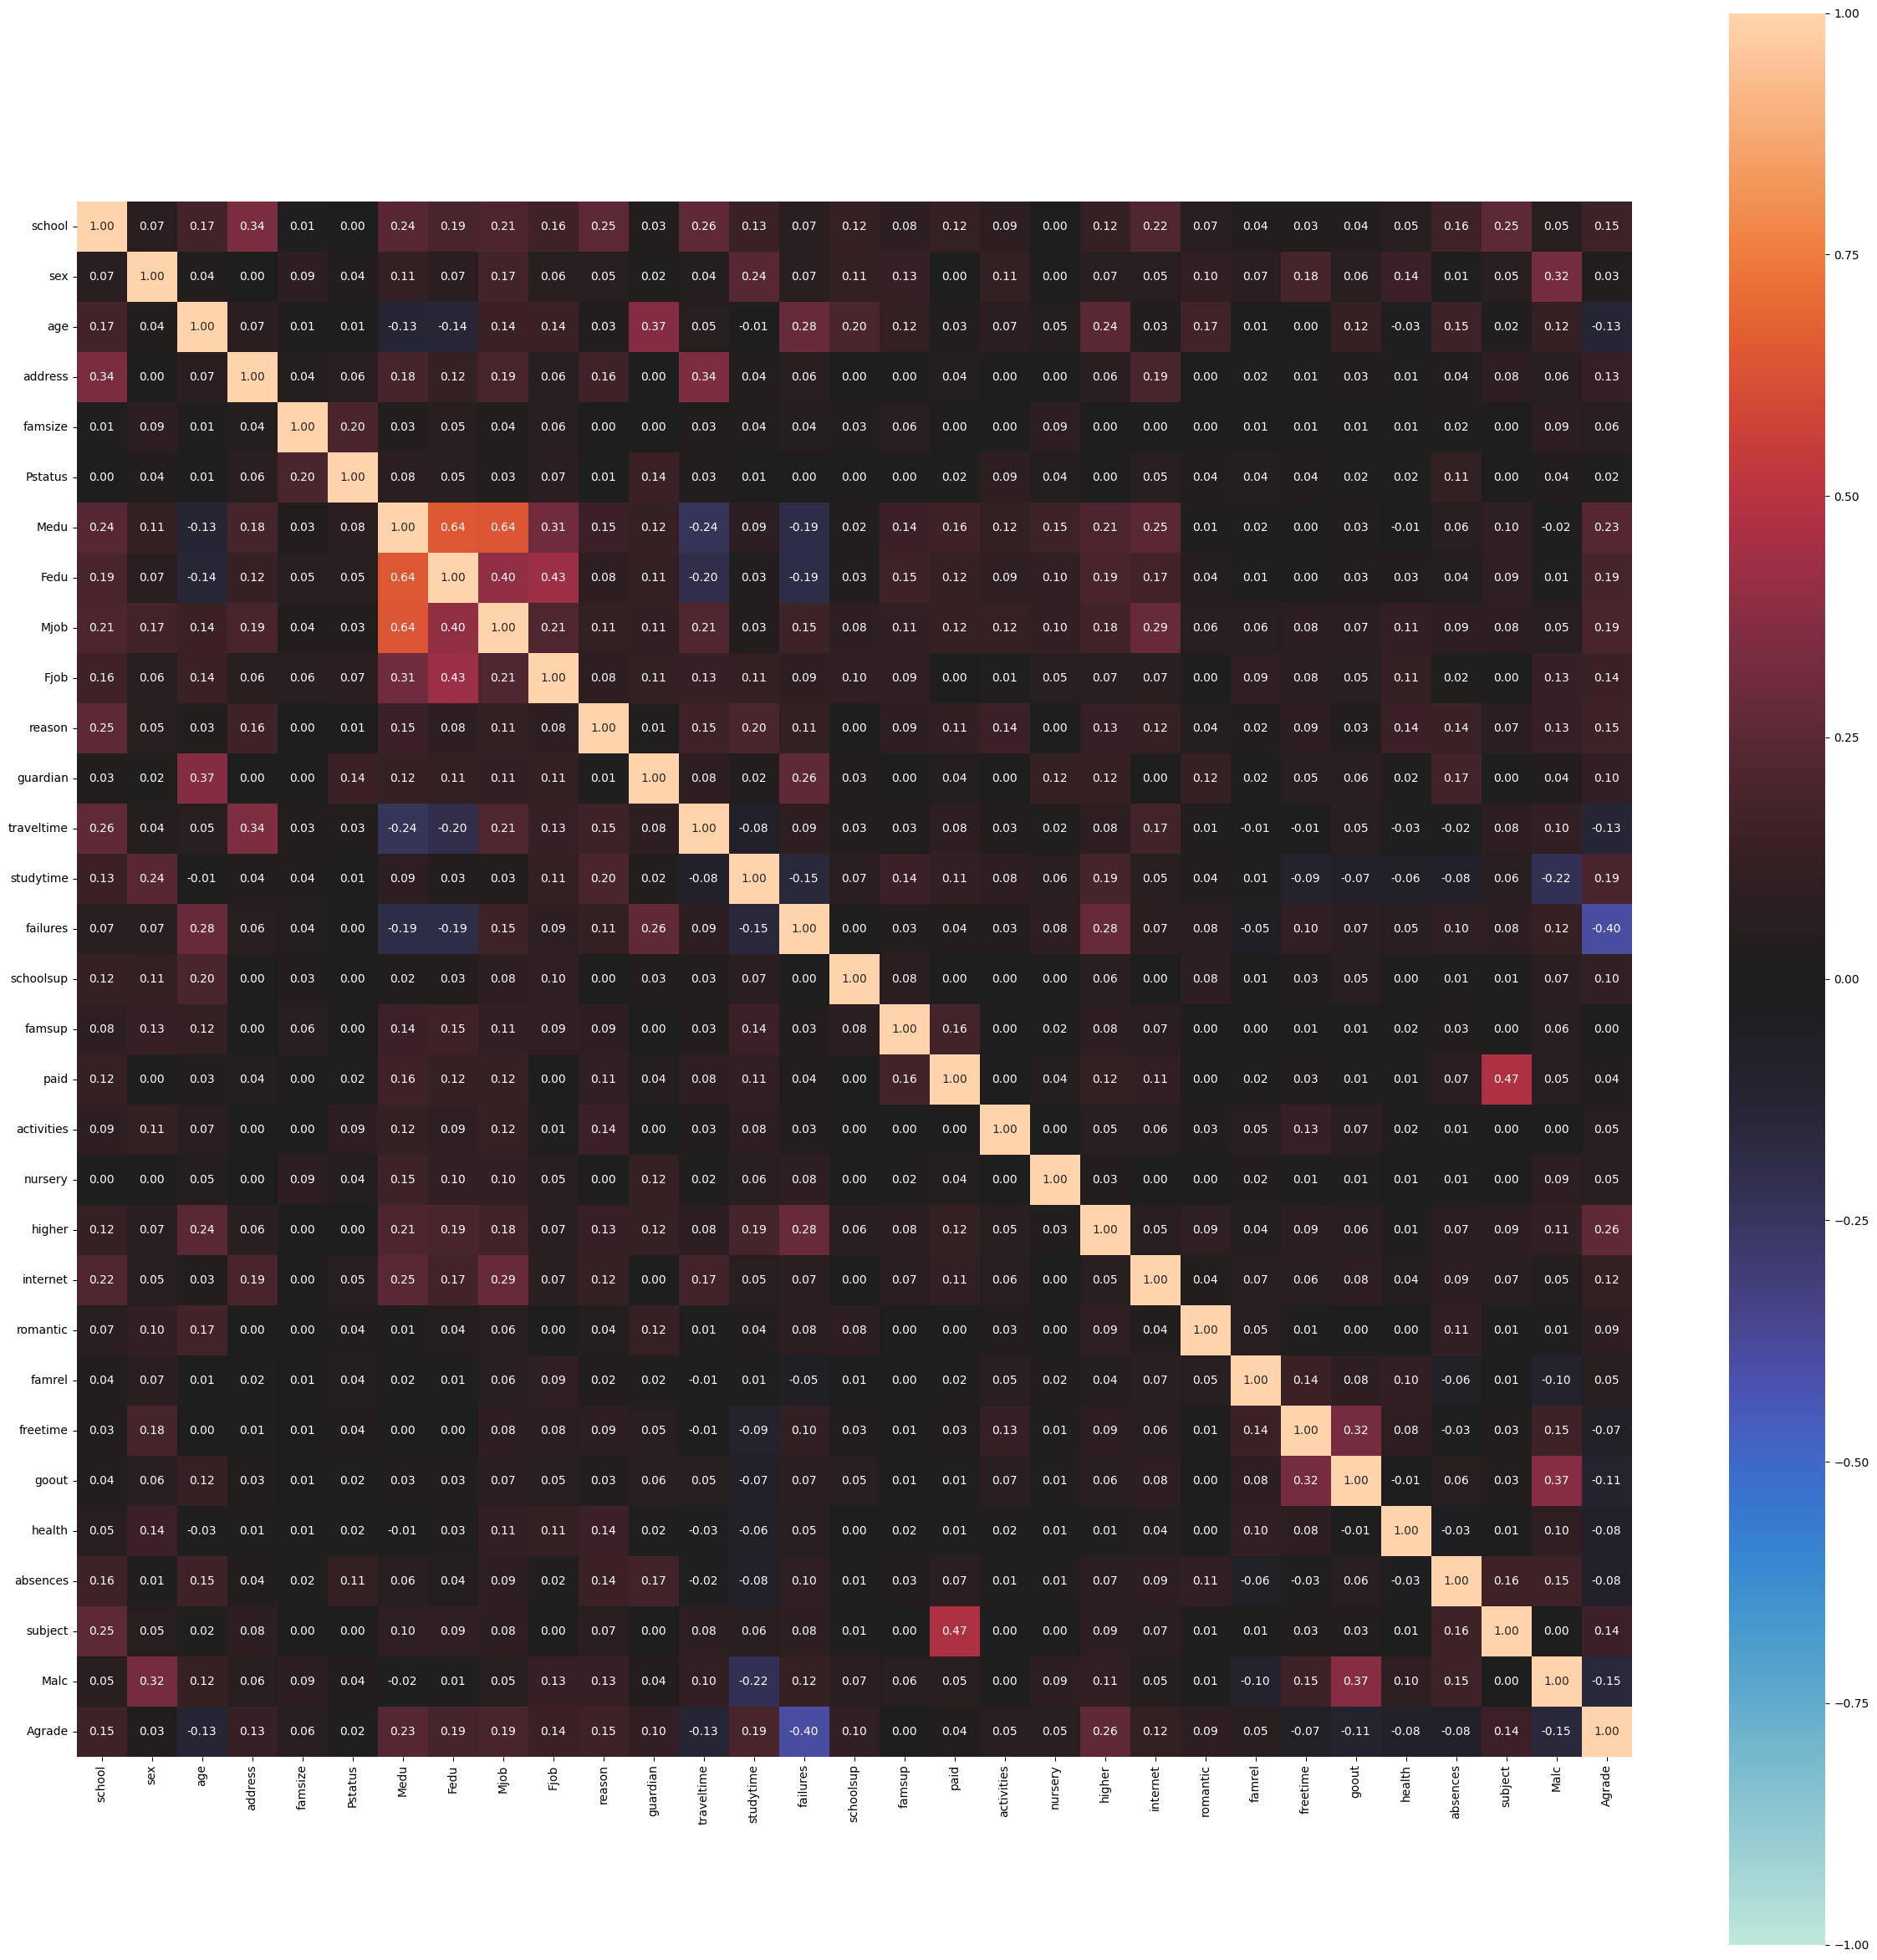

In [29]:
complete_correlation = associations(concat_df, filename='./corr_png/concat_corr2.png', figsize=(30, 30))

In [30]:
complete_correlation['corr'].sort_values(by='Malc', ascending=False).style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,subject,Malc,Agrade
Malc,0.047,0.322,0.125,0.057,0.093,0.038,-0.018,0.013,0.052,0.132,0.127,0.038,0.105,-0.221,0.123,0.072,0.058,0.047,0.001,0.092,0.108,0.046,0.010,-0.100,0.151,0.374,0.099,0.151,0.003,1.000,-0.152
goout,0.037,0.063,0.119,0.031,0.006,0.020,0.026,0.030,0.075,0.051,0.029,0.065,0.050,-0.073,0.075,0.051,0.005,0.013,0.072,0.014,0.063,0.084,0.004,0.081,0.324,1.000,-0.014,0.056,0.032,0.374,-0.107
sex,0.066,1.000,0.039,0.000,0.087,0.037,0.109,0.071,0.174,0.060,0.055,0.021,0.043,0.240,0.066,0.112,0.132,0.000,0.110,0.000,0.069,0.052,0.102,0.075,0.182,0.063,0.141,0.013,0.052,0.322,0.029
absences,0.155,0.013,0.153,0.037,0.018,0.114,0.060,0.041,0.087,0.023,0.140,0.169,-0.023,-0.076,0.100,0.009,0.031,0.071,0.010,0.011,0.073,0.091,0.105,-0.062,-0.032,0.056,-0.027,1.000,0.160,0.151,-0.077
freetime,0.026,0.182,0.003,0.010,0.007,0.039,0.001,0.002,0.085,0.077,0.087,0.055,-0.007,-0.094,0.103,0.026,0.006,0.035,0.129,0.014,0.087,0.061,0.012,0.137,1.000,0.324,0.082,-0.032,0.026,0.151,-0.065
Fjob,0.157,0.060,0.138,0.059,0.060,0.072,0.305,0.429,0.213,1.000,0.082,0.114,0.126,0.114,0.089,0.097,0.094,0.000,0.011,0.051,0.070,0.066,0.000,0.095,0.077,0.051,0.111,0.023,0.000,0.132,0.138
reason,0.254,0.055,0.026,0.159,0.000,0.007,0.146,0.084,0.112,0.082,1.000,0.011,0.154,0.199,0.110,0.000,0.092,0.106,0.142,0.000,0.128,0.118,0.040,0.025,0.087,0.029,0.142,0.140,0.071,0.127,0.149
age,0.170,0.039,1.000,0.071,0.013,0.007,-0.130,-0.139,0.135,0.138,0.026,0.365,0.049,-0.008,0.282,0.203,0.117,0.028,0.074,0.047,0.245,0.033,0.174,0.007,0.003,0.119,-0.029,0.153,0.019,0.125,-0.129
failures,0.067,0.066,0.282,0.061,0.045,0.005,-0.188,-0.191,0.152,0.089,0.110,0.263,0.087,-0.152,1.000,0.002,0.028,0.036,0.028,0.083,0.285,0.074,0.076,-0.054,0.103,0.075,0.048,0.100,0.083,0.123,-0.397
higher,0.124,0.069,0.245,0.064,0.000,0.000,0.207,0.192,0.179,0.070,0.128,0.124,0.082,0.187,0.285,0.065,0.079,0.116,0.049,0.026,1.000,0.050,0.095,0.042,0.087,0.063,0.008,0.073,0.088,0.108,0.264


In [31]:
px.bar(corr_df, x='Malc')

In [32]:
# 상관계수를 절대값을 해준 후 데이터 프레임 만들기
abs_df = corr_df.Malc.abs().to_frame('corr_score').corr_score.nlargest(31).to_frame('score')

- 음의 상관관계도 포함

In [33]:
abs_df.reset_index(inplace=True)

In [34]:
choice_col_list_df = abs_df.head(17)

In [35]:
choice_col_list_df

,index,score
0,Malc,1.00
1,goout,0.37
2,sex,0.32
3,studytime,0.22
4,Agrade,0.15
5,absences,0.15
6,freetime,0.15
7,Fjob,0.13
8,reason,0.13
9,age,0.12


---

### 최종 상관계수

In [36]:
Malc_df = corr_df[['Malc']]

In [37]:
Malc_df.reset_index(inplace=True)

In [38]:
pos_14_corr_df = Malc_df.head(14)

In [39]:
neg_4_corr_df = Malc_df.tail(3)

In [40]:
most_corr_df= pd.concat([pos_14_corr_df, neg_4_corr_df],axis=0)

In [41]:
most_corr_df.columns = ['features', 'score']

In [42]:
most_corr_df.reset_index(inplace=True)

In [43]:
most_corr_df.drop('index', inplace=True, axis=1)

In [44]:
most_corr_df

,features,score
0,Malc,1.00
1,goout,0.37
2,sex,0.32
3,absences,0.15
4,freetime,0.15
5,Fjob,0.13
6,reason,0.13
7,age,0.12
8,failures,0.12
9,higher,0.11


---

#### 일 소비량과 주말 소비량을 합쳐서 본 히트맵
학업에서 성공하는 비결은 술??????
- 술 마시면 자신감이 배가 되어 시험을 잘 본다는 것이 학계의 정설!!



- 술을 마신다고 해서 성적과 연관이 있을까? -> 결과적으로 술을 마시는 행위 자체가 일탈이라고 볼 수 있을까? -> 성적이 높다고 하여 모범생??????
- 부모님의 교육 여부에 따라 술 소비량이 달라질까?
- 나이가 많다고 해서 술을 많이 마실까?
- 학교별로 나누어서 술 소비량이 성적에 미치는 것을 구별해야 할까?
- 그럼 술을 많이 마시게 되는 요인이 무엇이 될까?
  - 학교 환경
  - 나가서 놀기
  - 나이
  - 부모님의 교육상태
  - 여가시간
  - 공부시간???
  - 건강
  - 결석
  - 성적?
  - 과목? 근데 수학을 선택했다면 누칼협아님?

- 용정 : 'failures', 'freetime', 'Fjob', AGrade
- 종호 : 'studytime', 'sex', 'age', 'reason'
- 정원 : 'goout', famrel, 'absences', 'health'

- Medu, famrel, AGrade, studytime

## 범주형 변수 수치형변수로 변환하기

In [45]:
def init_mapping(data, col_ls):
    """_summary_

    Args:
        data (DataFrame): 변환하고자 하는 데이터 프레임
        col_name (list): 변환하고 하자는 데이터 프레임의 컬럼명을 리스트로 input
    """
    print('Start Mapping.......')
    print('-' * 50)
    for i in range(len(col_ls)):
        data_ls = data[col_ls[i]].unique()
        print('column name :', col_ls[i])
        num = []
        if len(data_ls) == 2:
            num = [i for i in range(len(data_ls))] # 번호 생성
        else:
            num = [i + 1 for i in range(len(data_ls))]
        ls = [(data_ls[i], num[i]) for i in range(len(data_ls))] # 해당 컬럼의 데이터 와 번호 리스트로 생성
        print(ls)
        mapping = dict(ls) # dict로 만듬
        data[col_ls[i]] = data[col_ls[i]].apply(lambda x: mapping[x]) # mapping 적용

In [46]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

In [47]:
# Fjob은 unique의 순서가 달라 따로 맵핑함
mapping = {
    'at_home' : 1,
    'health' : 2,
    'other' : 3, 
    'services': 4,
    'teacher' : 5
}
concat_df['Fjob'] = concat_df['Fjob'].apply(lambda x: mapping[x])

In [48]:
mapping = {
    'yes' : 1,
    'no' :0
}
concat_df['schoolsup'] = concat_df['schoolsup'].apply(lambda x: mapping[x])
concat_df['nursery'] = concat_df['nursery'].apply(lambda x: mapping[x])
concat_df['higher'] = concat_df['higher'].apply(lambda x: mapping[x])

In [49]:
col_ls = [
    'school', 'sex', 'address', 'famsize', 
    'Pstatus', 'Mjob', 'reason', 'guardian', 
    'famsup', 'paid', 'activities', 'internet', 
    'romantic', 'subject'
    ]

In [50]:
init_mapping(concat_df, col_ls)

Start Mapping.......
--------------------------------------------------
column name : school
[('GP', 0), ('MS', 1)]
column name : sex
[('F', 0), ('M', 1)]
column name : address
[('U', 0), ('R', 1)]
column name : famsize
[('GT3', 0), ('LE3', 1)]
column name : Pstatus
[('A', 0), ('T', 1)]
column name : Mjob
[('at_home', 1), ('health', 2), ('other', 3), ('services', 4), ('teacher', 5)]
column name : reason
[('course', 1), ('other', 2), ('home', 3), ('reputation', 4)]
column name : guardian
[('mother', 1), ('father', 2), ('other', 3)]
column name : famsup
[('no', 0), ('yes', 1)]
column name : paid
[('no', 0), ('yes', 1)]
column name : activities
[('no', 0), ('yes', 1)]
column name : internet
[('no', 0), ('yes', 1)]
column name : romantic
[('no', 0), ('yes', 1)]
column name : subject
[('M', 0), ('P', 1)]


In [51]:
concat_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,subject,Malc,Agrade
0,0,0,18,0,0,0,4,4,1,5,1,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,6,0,1.00,5.67
1,0,0,17,0,0,1,1,1,1,3,1,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,4,0,1.00,5.33
2,0,0,15,0,1,1,1,1,1,3,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,10,0,2.50,8.33
3,0,0,15,0,0,1,4,2,2,4,3,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,2,0,1.00,14.67
4,0,0,16,0,0,1,3,3,3,3,3,2,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,4,0,1.50,8.67
5,0,1,16,0,1,1,4,3,4,3,4,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,5,10,0,1.50,15.00
6,0,1,16,0,1,1,2,2,3,3,3,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,3,0,0,1.00,11.67
7,0,0,17,0,0,0,4,4,3,5,3,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,6,0,1.00,5.67
8,0,1,15,0,1,0,3,2,4,3,3,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,0,0,1.00,17.67
9,0,1,15,0,0,1,3,4,3,3,3,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,5,0,0,1.00,14.67


In [54]:
concat_df.to_csv('~/desktop/git/hakcerton/data/preprocessing/final_data.csv', index=False)

------------------------------------------------------------------------------------------------

In [135]:
#필요데이터: 
    # Dalc
    # Walc
    # Malc 우선 이거부터

    # studytime
    # sex
    # age
    # reason

df_new = concat_df.iloc[:,[1,2,10,13,29]]
df_new.head(-10)


,sex,age,reason,studytime,Malc
0,0,18,1,2,1.00
1,0,17,1,2,1.00
2,0,15,2,2,2.50
3,0,15,3,3,1.00
4,0,16,3,2,1.50
...,...,...,...,...,...
1029,0,18,3,2,1.50
1030,0,17,4,2,2.50
1031,1,18,3,2,2.50
1032,1,18,2,1,2.00


## 1. 술과 공부시간의 관계

- 술과 공부시간이 관계에 대해 파악해보자

- Weekday와 Weekend의 빈도수 비교

<br/>

1. 과목별 공부시간 (수학/포르투갈어)과 술 섭취 (Weekday/Weekend/All)
  - 수학/포르투갈어를 수강하는 학생의 공부시간은 평일 알콜 섭취 빈도와 어떠한 상관관계를 가지고 있는지
<br/>

  - 수학/포르투갈어를 수강하는 학생의 공부시간은 주말 알콜 섭취 빈도와 어떠한 상관관계를 가지고 있는지
<br/>

  - 수학/포르투갈어를 수강하는 학생의 공부시간은 전체 알콜 섭취 빈도와 어떠한 상관관계를 가지고 있는지    

<br/>

<br/>

2. 전체 학생 수와 전체 학생수의 술섭취 (Weekday/Weekend/All)
  - 전체 학생의 공부시간은 평일 알콜 섭취 빈도와 어떠한 상관관계를 가지고 있는지
<br/>

  - 전체 학생의 공부시간은 주말 알콜 섭취 빈도와 어떠한 상관관계를 가지고 있는지
<br/>

  - 전체 학생의 공부시간은 전체 알콜 섭취 빈도와 어떠한 상관관계를 가지고 있는지

<br/>

<br/>


3. 결론:
  - 각각 그래프와 결과에 대한 정리
<br/>
  
  - 결론
<br/>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'studytime')

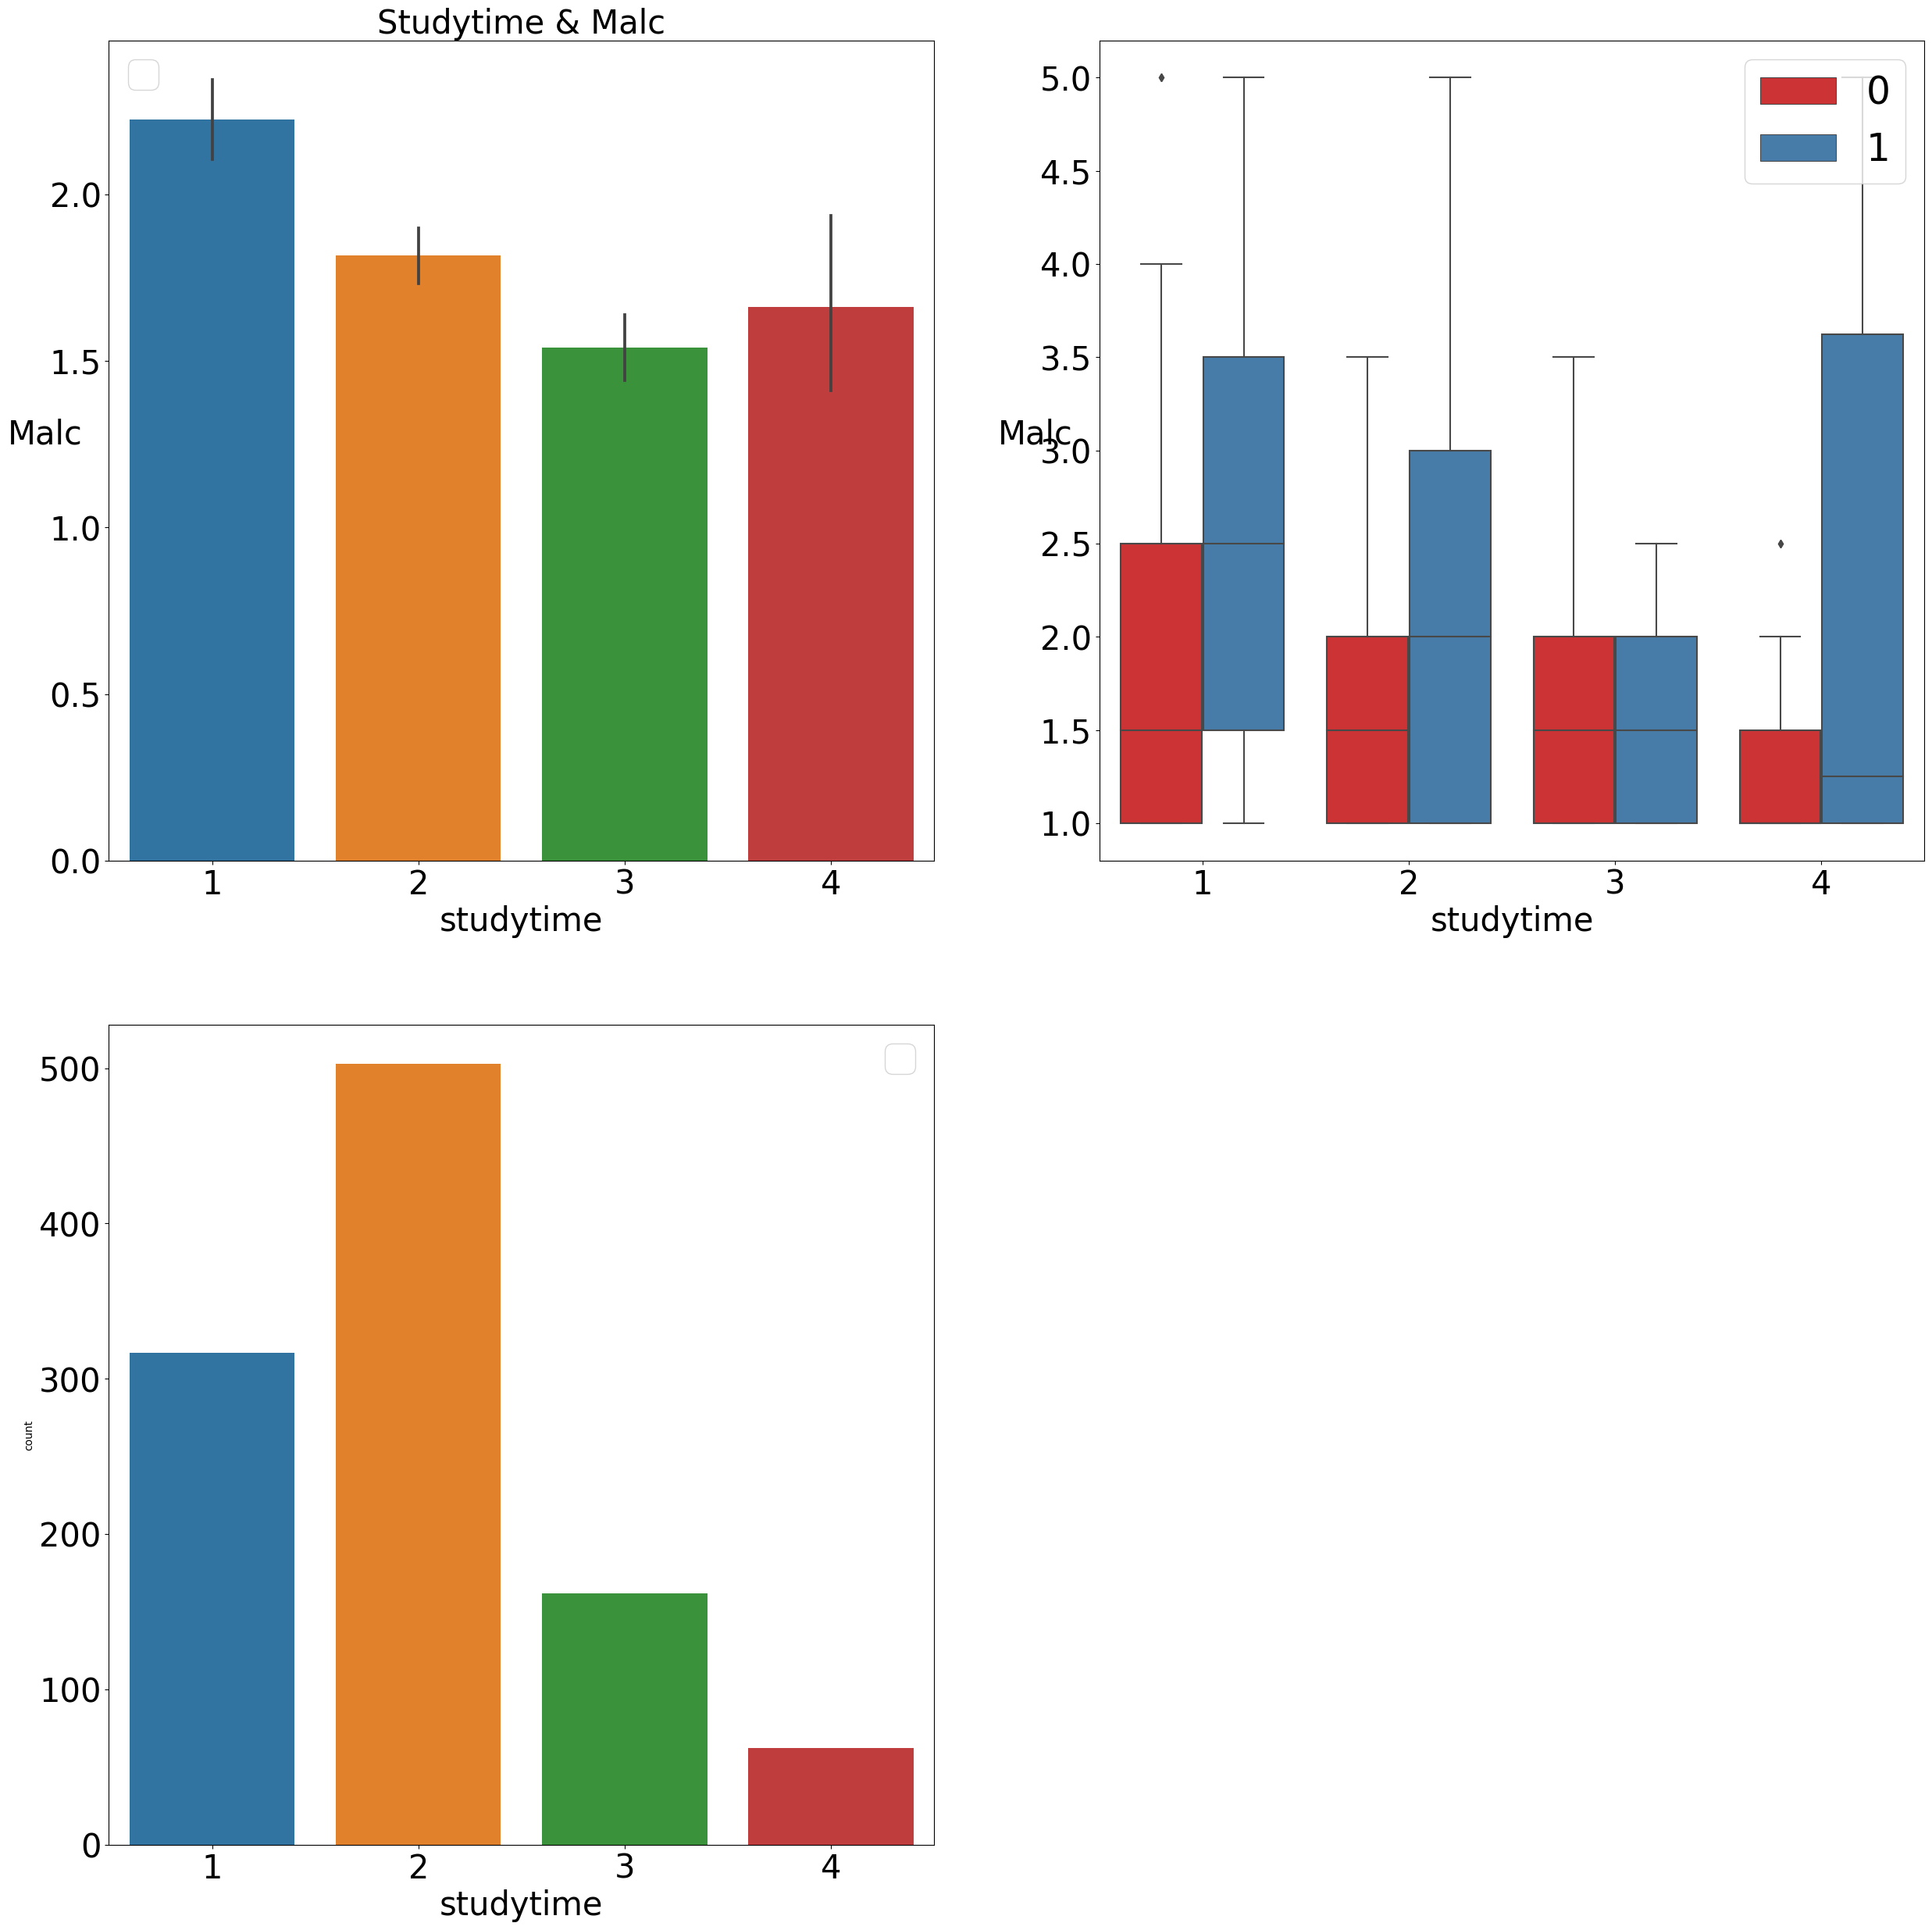

In [131]:
# 수학 수강하는 학생들의 공부시간과 모든날 알콜섭취 빈도
# studytime -> x축  // Malc -> y축


plt.figure(figsize = (30,30))

plt.subplot(221)
sns.barplot(x='studytime', y='Malc', data=df_new)
plt.legend(loc='upper left', fontsize=35)
plt.title('Studytime & Malc', size=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('studytime', fontsize=30)
plt.ylabel('Malc', rotation=0, fontsize=30)

plt.subplot(222)
sns.boxplot(x = 'studytime', y = 'Malc',data=df_new,
            hue='sex', palette='Set1')
plt.legend(loc='upper right', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('studytime', fontsize=30)
plt.ylabel('Malc', rotation=0, fontsize=30)

plt.subplot(223)
sns.countplot(x = 'studytime',data=df_new)
plt.legend(loc='upper right', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('studytime', fontsize=30)




Text(0, 0.5, 'Count')

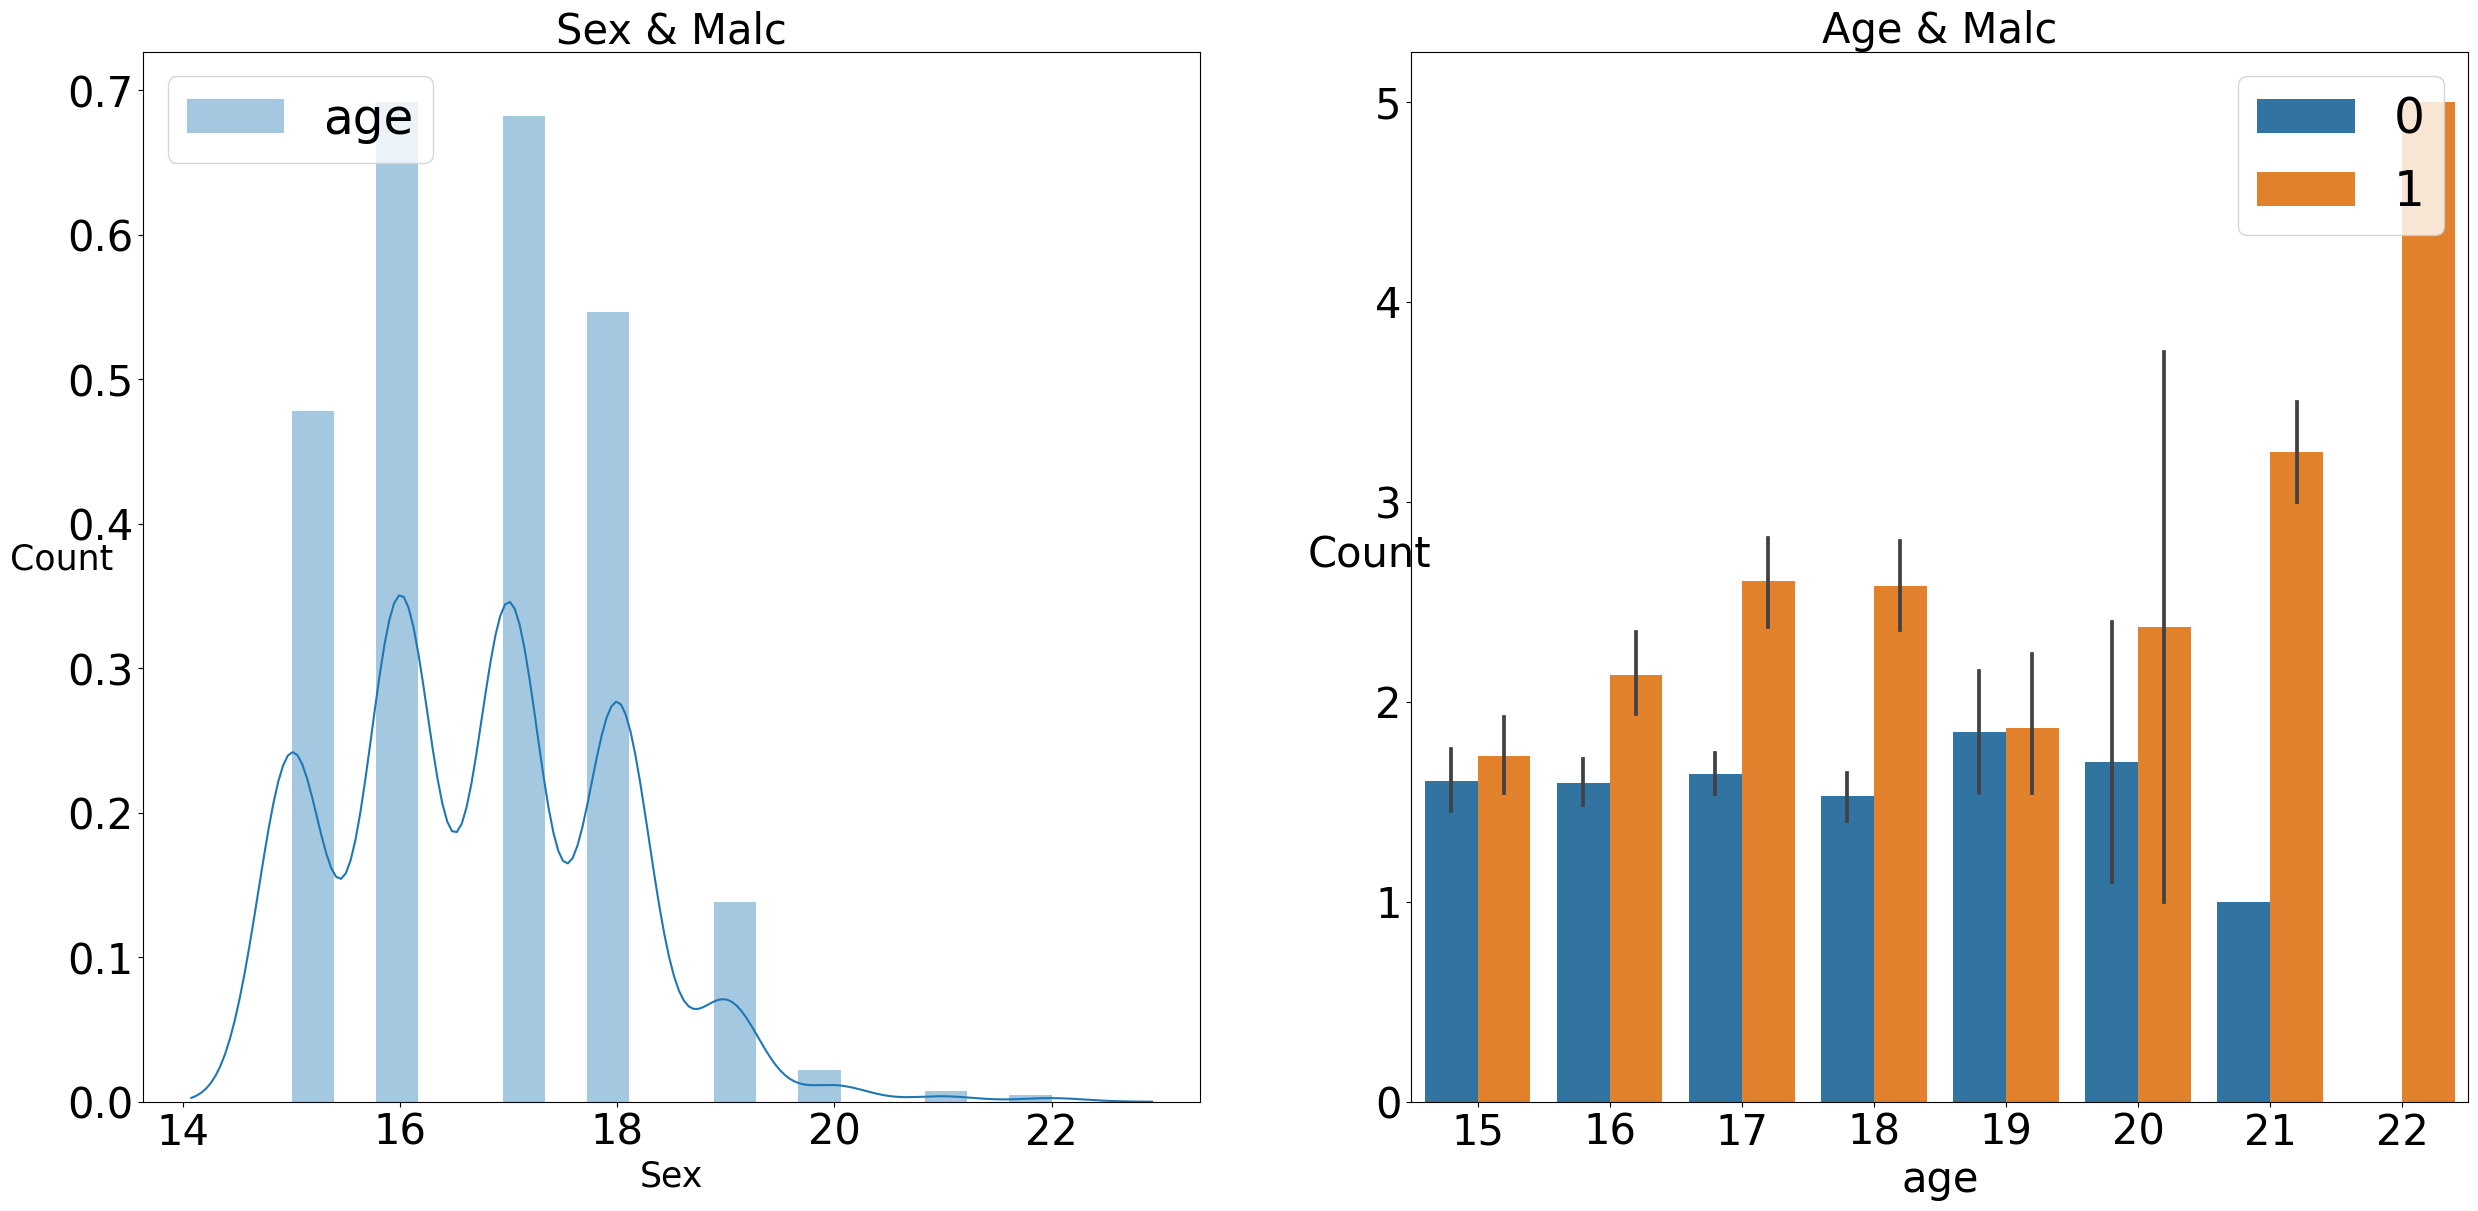

In [132]:
plt.figure(figsize = (30,30))


# 나이별 알콜섭취
plt.subplot(221)
sns.distplot(df_new['age'], label='age')
plt.legend(loc='upper left', fontsize=35)
plt.title('Sex & Malc', size=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Sex', fontsize=25)
plt.ylabel('Count', rotation=0, fontsize=25)

plt.subplot(222)
sns.barplot(data=concat_df, x='age',y='Malc' , hue='sex')
plt.legend(loc='upper right', fontsize=35)
plt.title('Age & Malc', size=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('age', fontsize=30)
plt.ylabel('Count', rotation=0, fontsize=30)


